# Single Transducer Pressure Distribution Simulation

## Far-field Piston Source Model Implementation

In [ ]:
import numpy as np
from scipy.special import j1  # Import Bessel function

# Constants
v_sound = 343  # Speed of sound (m/s)

omega = 2 * np.pi * 40000  # Ultrasound frequency of 40 kHz
rho_0 = 1.2  # Density of air (kg/m^3)
a = 0.005  # Transducer radius of 5 mm
U_0 = 1  # Velocity amplitude (arb.u.)

k = omega / v_sound  # Wavenumber
alpha = 0  # Phase shift (rad)

# Implementation of far-field piston source model; returns complex pressure
def p(r: float, theta: float, t: float) -> complex:
  prefactor = (1j * omega * rho_0 * a**2 * U_0) / (2 * r)
  bessel_term = 1 if np.sin(theta) < 1e-8 else 2 * j1(k * a * np.sin(theta)) / (k * a * np.sin(theta))

  return prefactor * np.exp(1j * (omega * t - k * r)) * bessel_term

# Create a version of p() that works on linspaces
def p_grid(r: np.ndarray, theta: np.ndarray, t: float) -> np.ndarray:
    p_vec = np.vectorize(p)

    return p_vec(r, theta, t)

## Initialization of Transducer(s)

In [ ]:
# Transducer class
class Transducer:
  def __init__(self, x: float, y: float, z: float, phi: float):
    self.x = x
    self.y = y
    self.z = z

    self.phi = phi

# Create a transducer at the origin
tr = Transducer(0, 0, 0, 0)

In [ ]:
# Create an x-y linspace at a height z
z = 0.1
x = np.linspace(-0.1, 0.1, 100)
y = np.linspace(-0.1, 0.1, 100)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2 + z**2)
THETA = np.arctan(np.sqrt(X**2 + Y**2) / z)

FIELD = p_grid(R, THETA, 0)

In [ ]:
# Create an x-z linspace at a distance y

x = np.linspace(-0.1, 0.1, 100)
y = 0
z = np.linspace(0.2, 0.4, 100)
X, Z = np.meshgrid(x, z)

R = np.sqrt(X**2 + y**2 + Z**2)
THETA = np.arctan(np.sqrt(X**2 + y**2) / Z)

FIELD = p_grid(R, THETA, 0)

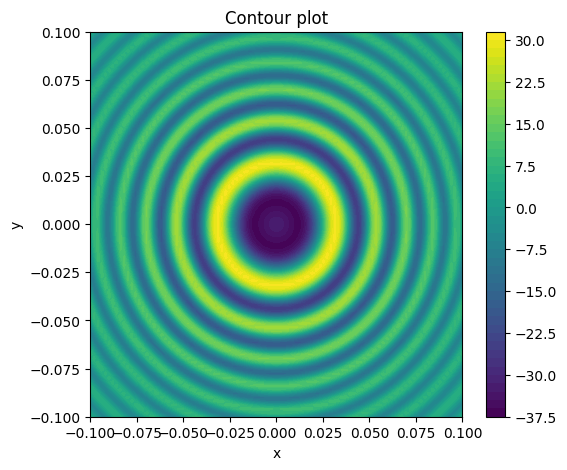

In [ ]:
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(6, 5))
contour = plt.contourf(X, Y, np.real(FIELD), levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Contour plot")
plt.show()

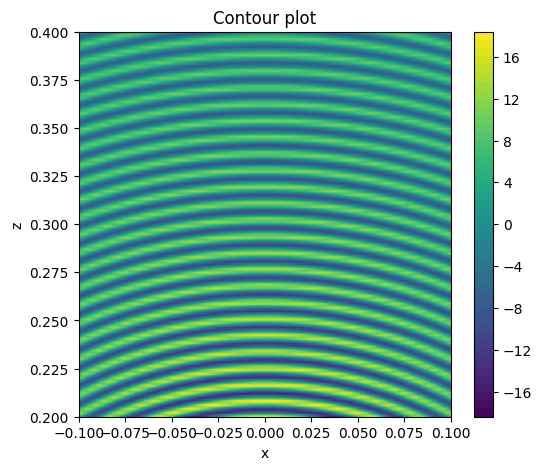

In [ ]:
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(6, 5))
contour = plt.contourf(X, Z, np.real(FIELD), levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Contour plot")
plt.show()